##**Logistic Regression for Binary Classification**

In [2]:
#Import required Libaraies 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
#Reading and getting dataset from the location where its present 
dataset=pd.read_csv("/content/drive/MyDrive/diabetes.csv")


##Data Analysis 

In [4]:
#Showing head of the dataset for knowing about it
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#showing shape the dataset 
dataset.shape

(768, 9)

the above shows that this dataset has 768 rows and 9 columns 

In [6]:
#showing the information 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


the above shows that how many colums are there and what are the types of columns and how much empty values are there 

##Data Visualization to understand it

when you understand your data properly then ypu will choose a suitable algorithm for it 


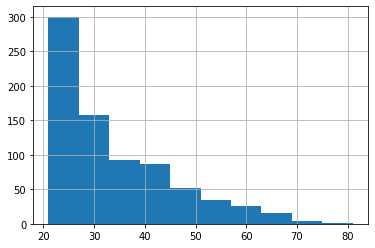

In [7]:
#ploting a histogram of age that which age people are and how much they are 
dataset['Age'].hist()
plt.show()

here histogram of age shows that almost 300 peoples are of age 20 to 25. 150 are of age of 25 to 30 and so on..


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


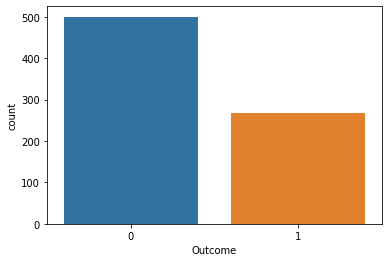

In [8]:
 #showing the independent column which is our ouput that how much people are daibetic and how are non daibetic
 sns.countplot(dataset['Outcome'])
 plt.show()

The above shows that aproximately 500 are non diabetics and aproximately 250 are diabetic 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


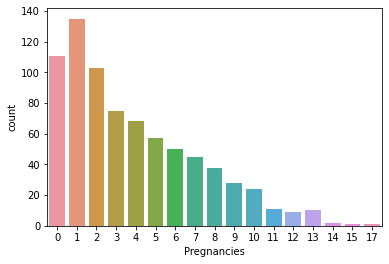

In [9]:
#Showing how many female are pregnancy 
sns.countplot(dataset['Pregnancies'])
plt.show()

the above show that 100 female wich zero pregnancy 130 female with 1 pregnancy etc 

##Dividing the data into dependent and independent variable 
X = Independent (inputs ) 
                     Y = Dependent (output)

In [10]:
x= dataset.iloc[:,0:8]
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y = dataset.iloc[:,8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

##Splitting the data in train in test 

In [15]:
from sklearn.model_selection import train_test_split
x_train ,  x_test , y_train ,y_test = train_test_split(x,y, test_size=.10)

In [16]:
#Showing the data 
print("Size of x_train is ",x_train.shape)
print("Size of y_train is ",y_train.shape)
print("Size of x_test is ",x_test.shape)
print("Size of y_test is ",y_test.shape)


Size of x_train is  (691, 8)
Size of y_train is  (691,)
Size of x_test is  (77, 8)
Size of y_test is  (77,)


##Fitting the Model

In [20]:
#importing model 
from sklearn.linear_model import LogisticRegression

#calling the model 
model = LogisticRegression(random_state = 0) #random_state=0 or any other integer will keep the data in train and test same....

#fitting or training the model..The fit is used for training
model.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Testing the Model


In [21]:
prediction = model.predict(x_test) # predict is use for prediction
print(prediction)

[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0]


##Showing the Accuracy 

In [22]:
from sklearn.metrics import accuracy_score
print("Model Accuracy is ", accuracy_score(y_test,prediction)) 

Model Accuracy is  0.7922077922077922
